# Random Forest: Feature Selection

In [1]:
import sys
print(sys.executable)

/Users/kata/opt/anaconda3/bin/python


In [117]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import treeplot
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [118]:
df = pd.read_csv('/Users/kata/Desktop/GitHub/standby_duty_forecasting/sickness_table.csv') #, index_col=0)
df['date'] = pd.to_datetime(df['date'])
df


,Unnamed: 0,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
0,0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,4,2016-04-05,63,7236.0,1700,90,0.0,0.0
...,...,...,...,...,...,...,...,...
1147,1147,2019-05-23,86,8544.0,1900,90,0.0,0.0
1148,1148,2019-05-24,81,8814.0,1900,90,0.0,0.0
1149,1149,2019-05-25,76,9846.0,1900,90,146.0,56.0
1150,1150,2019-05-26,83,9882.0,1900,90,160.0,70.0


In [119]:
df['diff_drivers'] = df['n_duty'] - df['n_sick']


df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day']= df['date'].dt.day

In [120]:
df['day_of_week'] = df['date'].dt.dayofweek
df


,Unnamed: 0,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,diff_drivers,year,month,day,day_of_week
0,0,2016-04-01,73,8154.0,1700,90,4.0,0.0,1627,2016,4,1,4
1,1,2016-04-02,64,8526.0,1700,90,70.0,0.0,1636,2016,4,2,5
2,2,2016-04-03,68,8088.0,1700,90,0.0,0.0,1632,2016,4,3,6
3,3,2016-04-04,71,7044.0,1700,90,0.0,0.0,1629,2016,4,4,0
4,4,2016-04-05,63,7236.0,1700,90,0.0,0.0,1637,2016,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1147,2019-05-23,86,8544.0,1900,90,0.0,0.0,1814,2019,5,23,3
1148,1148,2019-05-24,81,8814.0,1900,90,0.0,0.0,1819,2019,5,24,4
1149,1149,2019-05-25,76,9846.0,1900,90,146.0,56.0,1824,2019,5,25,5
1150,1150,2019-05-26,83,9882.0,1900,90,160.0,70.0,1817,2019,5,26,6


In [121]:
df['week'] = df['date'].dt.isocalendar().week

In [122]:
df.columns

Index(['Unnamed: 0', 'date', 'n_sick', 'calls', 'n_duty', 'n_sby', 'sby_need',
       'dafted', 'diff_drivers', 'year', 'month', 'day', 'day_of_week',
       'week'],
      dtype='object')

In [123]:
X = df[['n_sick', 'calls', 'n_duty', 'n_sby', 'sby_need', 'diff_drivers', 'year', 'month', 'day_of_week',
       'week']]
y = df.sby_need
X

,n_sick,calls,n_duty,n_sby,sby_need,diff_drivers,year,month,day_of_week,week
0,73,8154.0,1700,90,4.0,1627,2016,4,4,13
1,64,8526.0,1700,90,70.0,1636,2016,4,5,13
2,68,8088.0,1700,90,0.0,1632,2016,4,6,13
3,71,7044.0,1700,90,0.0,1629,2016,4,0,14
4,63,7236.0,1700,90,0.0,1637,2016,4,1,14
...,...,...,...,...,...,...,...,...,...,...
1147,86,8544.0,1900,90,0.0,1814,2019,5,3,21
1148,81,8814.0,1900,90,0.0,1819,2019,5,4,21
1149,76,9846.0,1900,90,146.0,1824,2019,5,5,21
1150,83,9882.0,1900,90,160.0,1817,2019,5,6,21


In [124]:
def train_test_split(data, n_test):
	return data[:n_test], data[n_test:]

In [125]:
x_train, x_test = train_test_split(X, 921)
y_train, y_test = train_test_split(y, 921)


In [174]:
tree_reg = DecisionTreeRegressor(max_depth=7, random_state=42)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [175]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [176]:
ax = treeplot.plot(tree_reg, plottype='vertical')

[treeplot] >Install graphviz first: <sudo apt install python-pydot python-pydot-ng graphviz>


In [177]:
test_pred = tree_reg.predict(x_test)
train_pred = tree_reg.predict(x_train)
y2 = np.concatenate((train_pred, test_pred))



In [178]:
# create column numerate
df['numbers'] = np.arange(len(df))
df

,Unnamed: 0,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,diff_drivers,year,month,day,day_of_week,week,numbers
0,0,2016-04-01,73,8154.0,1700,90,4.0,0.0,1627,2016,4,1,4,13,0
1,1,2016-04-02,64,8526.0,1700,90,70.0,0.0,1636,2016,4,2,5,13,1
2,2,2016-04-03,68,8088.0,1700,90,0.0,0.0,1632,2016,4,3,6,13,2
3,3,2016-04-04,71,7044.0,1700,90,0.0,0.0,1629,2016,4,4,0,14,3
4,4,2016-04-05,63,7236.0,1700,90,0.0,0.0,1637,2016,4,5,1,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1147,2019-05-23,86,8544.0,1900,90,0.0,0.0,1814,2019,5,23,3,21,1147
1148,1148,2019-05-24,81,8814.0,1900,90,0.0,0.0,1819,2019,5,24,4,21,1148
1149,1149,2019-05-25,76,9846.0,1900,90,146.0,56.0,1824,2019,5,25,5,21,1149
1150,1150,2019-05-26,83,9882.0,1900,90,160.0,70.0,1817,2019,5,26,6,21,1150


In [179]:
y_test.shape
df.numbers.iloc[921:].shape

(231,)

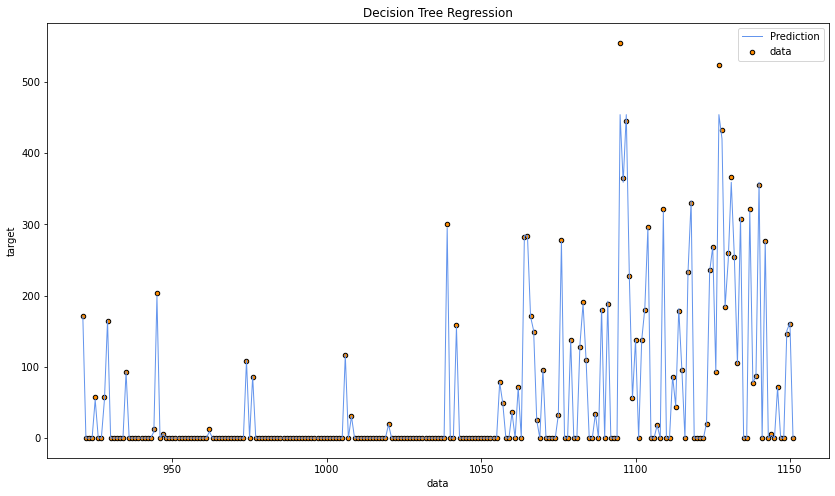

In [180]:

# Plot the results
plt.figure(figsize=(14,8))
plt.scatter(df.numbers.iloc[921:], y_test, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(df.numbers.iloc[921:], test_pred, color="cornflowerblue", label="Prediction", linewidth=1)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()



In [181]:
print('mse test set ' + str(mean_squared_error(y_test, test_pred)))
print('mse train set ' + str(mean_squared_error(y_train, train_pred)))


mse test set 67.99505531505531
mse train set 0.10941006152732537


In [182]:
# max depth 7
# mse test set 67.99505531505531
# mse train set 0.10941006152732537

In [183]:
#max depth 5
# mse test set 68.29361982132801
# mse train set 3.589715752337902